In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
src = ceo.Source('R',rays_box_size=25.5,rays_box_sampling=129,rays_origin=[0,0,25])
gmt = ceo.GMT_MX()

In [3]:
src.reset()
gmt.propagate(src)

In [4]:
img = ceo.Imaging(1)

0.00445799 3.02898


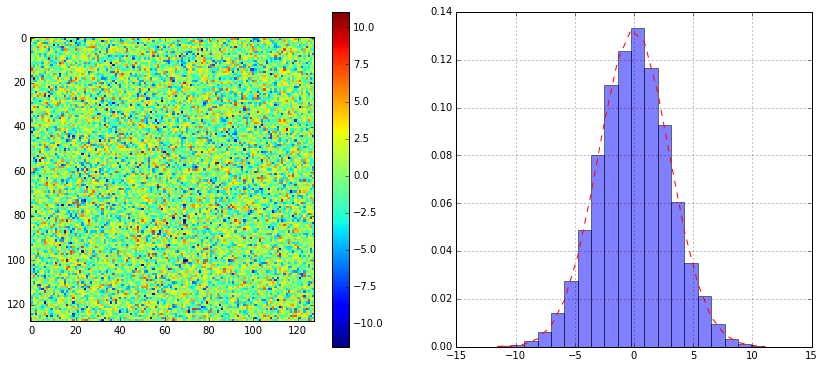

In [5]:
img.reset()
ron = 3
img.readOut(1.,ron)

(fig,(ax1,ax2)) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(img.frame.host(),interpolation='none')
plt.colorbar(h1,ax=ax1)

print np.mean(img.frame.host_data), np.std(img.frame.host_data)

if np.any(img.frame.host_data):
    n, bins, patches = ax2.hist(img.frame.host_data.ravel(),20, normed=1, alpha=0.5)
    y = mlab.normpdf( bins, 0, ron)
    l = ax2.plot(bins, y, 'r--', linewidth=1)
    ax2.grid(True)

In [6]:
src.nBackgroundPhoton(10)*img.pixelScaleArcsec(src)**2

2589.8511107559916

In [7]:
img.pixelScaleArcsec(src)

0.0025884210822717238

2589.85111076 71.9701481276
2589.93 71.3789


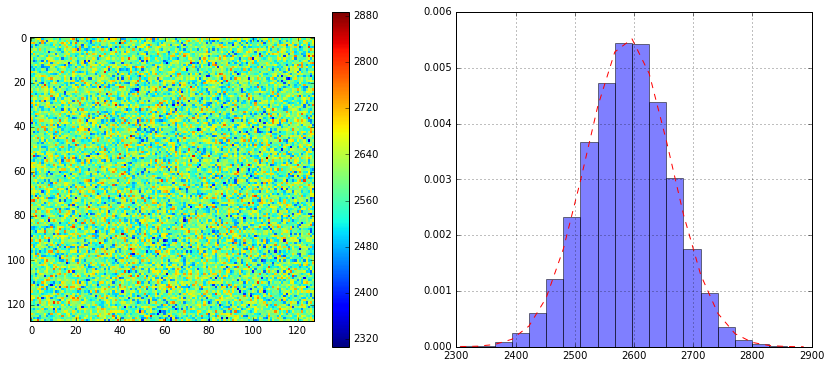

In [8]:
img.reset()
ron = 0.
nB = src.nBackgroundPhoton(10)*img.pixelScaleArcsec(src)**2
NF = np.sqrt(2)
img.readOut(1.,ron,nB,NF)

(fig,(ax1,ax2)) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(img.frame.host(),interpolation='none')
plt.colorbar(h1,ax=ax1)

s = np.sqrt(NF**2*nB+ron**2)
print nB, s
print np.mean(img.frame.host_data), np.std(img.frame.host_data)

if np.any(img.frame.host_data):
    n, bins, patches = ax2.hist(img.frame.host_data.ravel(),20, normed=1, alpha=0.5)
    y = mlab.normpdf( bins, nB, s)
    l = ax2.plot(bins, y, 'r--', linewidth=1)
    ax2.grid(True)

In [9]:
def NPHOTON(_mag_,area=1):
    return 10.87e9*10**(-0.4*_mag_)*area

In [10]:
print NPHOTON(0)
print NPHOTON(0,355.611)

10870000000.0
3.86549157e+12


In [11]:
print NPHOTON(4)
print NPHOTON(4,355)

273042055.105
96929929562.3


In [12]:
src.nPhoton

array([  1.08699996e+10])

In [13]:
srcs = ceo.Source('R',zenith=np.zeros(3),rays_box_size=25.5,rays_box_sampling=129,rays_origin=[0,0,25])
imgs = ceo.Imaging(1,N_PX_IMAGE=129*2,N_SOURCE=3)
img = ceo.Imaging(1,N_PX_IMAGE=129*2)

In [14]:
src.reset()
img.reset()
gmt.propagate(src)
img.propagate(src)
print src.nPhoton
print np.max(img.frame.host())
print np.sum(img.frame.host())

[  1.08699996e+10]
4.03241e+11
3.86549e+12


In [15]:
129**2

16641

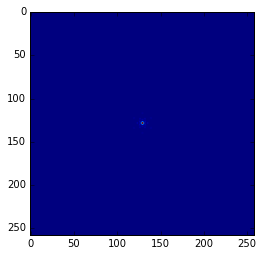

In [16]:
plt.imshow(img.frame.host())

In [17]:
src.reset()
img.reset()
gmt.propagate(src)
img.propagate(src)
print src.nPhoton
print np.max(img.frame.host())
print np.sum(img.frame.host())

[  1.08699996e+10]
4.03241e+11
3.86549e+12


In [18]:
srcs.reset()
imgs.reset()
gmt.propagate(srcs)
imgs.propagate(srcs)
print srcs.nPhoton
print np.max(imgs.frame.host())
print np.sum(imgs.frame.host())

[  1.08699996e+10   1.08699996e+10   1.08699996e+10]
4.03241e+11
1.15965e+13


In [19]:
srcs.reset()
imgs.reset()
gmt.propagate(srcs)
imgs.propagate(srcs)
print srcs.nPhoton
print np.max(imgs.frame.host())
print np.sum(imgs.frame.host())

[  1.08699996e+10   1.08699996e+10   1.08699996e+10]
4.03241e+11
1.15965e+13


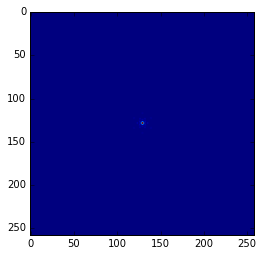

In [20]:
plt.imshow(np.concatenate([imgs.frame.host(),imgs.frame.host()])[:129*2,:])

In [21]:
srcsm = ceo.Source('R',magnitude=[0,2,4],zenith=np.zeros(3),
                  rays_box_size=25.5,rays_box_sampling=129,rays_origin=[0,0,25])


In [22]:
srcsm.reset()
imgs.reset()
gmt.propagate(srcsm)
imgs.propagate(srcsm)
print srcsm.nPhoton
print np.max(imgs.frame.host())
print np.sum(imgs.frame.host())

[  1.08699996e+10   1.72277875e+09   2.73042048e+08]
4.03241e+11
4.57523e+12


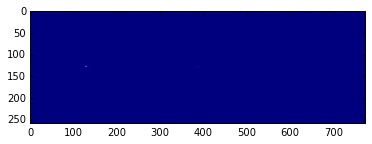

In [23]:
plt.imshow(imgs.frame.host().T)

In [24]:
Q = np.reshape(imgs.frame.host(),(3,129*2,129*2))

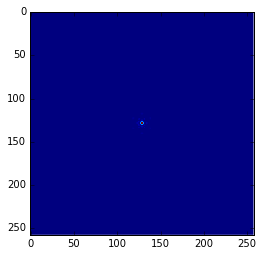

In [25]:
plt.imshow(Q[0,:,:],interpolation='none')

In [26]:
Q.sum(axis=1).sum(axis=1)

array([  3.86549232e+12,   6.12639441e+11,   9.70968187e+10], dtype=float32)

In [27]:
print NPHOTON(0,355.611)
print NPHOTON(2,355.611)
print NPHOTON(4,355.611)

3.86549157e+12
6.12639127481e+11
97096758258.0


In [28]:
srcsm.nPhoton

array([  1.08699996e+10,   1.72277875e+09,   2.73042048e+08])

In [29]:
print NPHOTON(0)
print NPHOTON(2)
print NPHOTON(4)

10870000000.0
1722778900.21
273042055.105


In [30]:
srcsm.magnitude

array([ 0.,  2.,  4.], dtype=float32)

In [32]:
srcsm.magnitude = np.array([10,12,14],dtype=np.float32)

In [33]:
srcsm.nPhoton

array([ 1086999.875    ,   172277.8125   ,    27304.2109375])

In [36]:
print NPHOTON(10)
print NPHOTON(12)
print NPHOTON(14)

1087000.0
172277.890021
27304.2055105
